### Histograms

Graph that illustrates the intensity distribution of a grey-scale image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

Left region of histogram shows the amount of darker pixels in image and right region shows the amount of brighter pixels.

We can decide to show only the range of intensities by passing the `BIN` parameter. If we the histogram for all the `256` intensities we can `[256]`.

Also we can use `plt.hist(img.ravel(),256,[0,256]); plt.show()` to display the histogram properly. 

#### **Histogram Equalization**

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. This method usually increases the global contrast of many images, especially when the image is represented by a narrow range of intensity values. Through this adjustment, the intensities can be better distributed on the histogram utilizing the full range of intensities evenly. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the highly populated intensity values which are used to degrade image contrast.

The method is useful in images with backgrounds and foregrounds that are both bright or both dark. In particular, the method can lead to better views of bone structure in x-ray images, and to better detail in photographs that are either over or under-exposed.

[Read Histogram Equalization Wiki](https://en.wikipedia.org/wiki/Histogram_equalization)

#### **Real World Use Cases**

In X-ray images, bones appear brighter, and tissues appear darker, often with low contrast. Applying histogram equalization:

- Enhances the visibility of bones and tissues.
- Aids in better diagnosis by improving image contrast.

#### **When to Use Histogram Equalization**

Histogram equalization is good when histogram of the image is confined to a particular region. It won't work good in places where there is large intensity variations where histogram covers a large region, i.e. both bright and dark pixels are present. 

<img src='./Notes_Images/hist1.png'>

Here, in the histogram of the real image we can see that the intensities are confined. So, we need to distribute the intensities for image to perform better.

#### CLAHE (Contrast Limited Adaptive Histogram Equalization) Vs Histogram Equalization

The first histogram equalization we just saw, considers the `global contrast` of the image. In many cases, it is not a good idea. For example, below image shows an input image and its result after global histogram equalization.

<img src='./Notes_Images/hist2.jpg'>

It is true that the background contrast has improved after histogram equalization. But compare the face of statue in both images. We lost most of the information there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases (Try to plot histogram of input image, you will get more intuition).

So to solve this problem, `adaptive histogram` equalization is used. In this, image is divided into small blocks called `tiles` (tileSize is `8x8` by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, `contrast limiting` is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, `bilinear interpolation` is applied.

#### 2D Histograms

Before, we calculated and plotted `one-dimensional` histogram. It is called `one-dimensional` because we are taking only one feature into our consideration, i.e. grayscale intensity value of the pixel. But in two-dimensional histograms, you consider two features. Normally it is used for finding color histograms where two features are `Hue` & `Saturation` values of every pixel.

**For 2D histograms Parameter**

`Channel` = [0,1] because we need to process both H and S plane.
`Bins` = [180,256] 180 for H plane and 256 for S plane.
`Range` = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

In [17]:
# Import 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

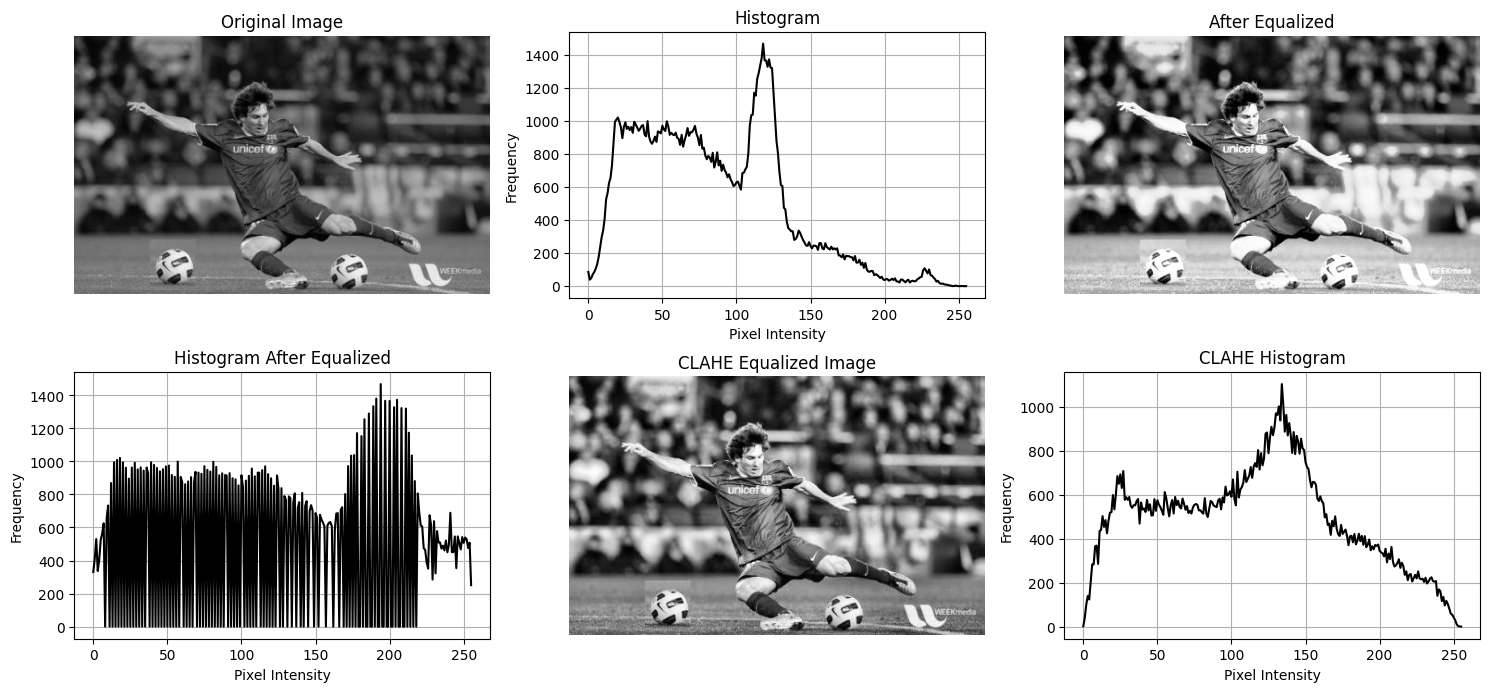

In [21]:
# Plot histogram

img = cv.imread("./roi.jpg",cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])

# Equalized Histogram
eqlz = cv.equalizeHist(img) # Histogram Equalizer for contrast balance
eqlz_hist = cv.calcHist([eqlz],[0],None,[256],[0,256])

# Adaptive Equalized Histogram
clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
adaptive_eqlz = clahe.apply(img)
adaptive_eqlz_hist = cv.calcHist([adaptive_eqlz], [0], None, [256], [0, 256])

# Plot original image and histogram
plt.figure(figsize=(15, 10))

# Show original image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

# Show histogram
plt.subplot(3, 3, 2)
plt.title("Histogram")
plt.plot(hist, color='black')  # Plot histogram
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)

# Equalized Histogram Image
plt.subplot(3,3,3)
plt.title("After Equalized")
plt.imshow(eqlz, cmap='gray')
plt.axis('off')

# Equalized Histogram
plt.subplot(3, 3, 4)
plt.title("Histogram After Equalized")
plt.plot(eqlz_hist, color='black')  # Plot histogram
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)

# CLAHE image
plt.subplot(3, 3, 5)
plt.title("CLAHE Equalized Image")
plt.imshow(adaptive_eqlz, cmap='gray')
plt.axis('off')

# CLAHE histogram
plt.subplot(3, 3, 6)
plt.title("CLAHE Histogram")
plt.plot(adaptive_eqlz_hist, color='black')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

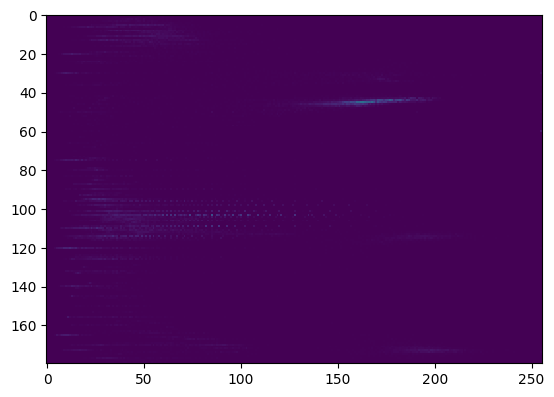

In [ ]:
# 2D Histogram 

img_for_hsv = cv.imread("./roi.jpg")

hsv = cv.cvtColor(img_for_hsv,cv.COLOR_BGR2HSV)
hsv_hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.imshow(hsv_hist,interpolation = 'nearest')
plt.show()